# Bank Marketing Campaign

## 1er fase: Definición de objetivo
Crear un modelo predictivo de la efectividad que tendrá una próxima posible campaña telefónica apoyandonós en los datos históricos del banco.

## 2da fase: Contexto comercial
Trabajaremos sobre campañas telefónicas de afiliación a los servicios de un banco portugues. Teniendo en cuenta lo costosas que son para el banco las campañas de marketing, necesita saber el comportamiento de sus clientes para con sus campañas y detectar de esa forma cuales son más eficientes y porque. Nos resulta importante entender al p´blico que nos conviene apuntar con estas campañas por lo que prestaremos máxima atención al tipo de trabajo y el nivel educativo de los alcanzados por las campañas históricas que nos proporciona el banco en el dataset.

## 3ra fase: Problema comercial
¿Cuales fueron las campañas más exitosas?, ¿las que tuvieron mejores resultados?

¿Que ocupaciones tendrán las personas que más contratan los servicios del banco?

¿Son las campañas telefónicas más efectivas entre las personas con estudios alcanzados más elevados?

## 4ta fase: Data Acquisition
Los datos con los que trabajaremos son datos históricos proporcionados por el banco sobre las 11 campañas telefónicas realizadas hasta la fecha, lso mismos son entregados en formato CSV que importaremos con la libreria pandas, en ellos encontraremos 3 'key values' la aceptación o no de la campaña, el nivel educacional y el tipo de trabajo que realiza la persona de cada registro.

In [1]:
import pandas as pd
import numpy as np
bank_df = pd.read_csv('bank-additional.csv',sep=';') # importamos pandas numpy y el csv que en este caso está separado por ;

## 5ta fase: Exploratory Data Analysis (EDA)

In [2]:
bank_df.head() # muestreamos lso datos para ver que tipo de información nos brindan.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
bank_df.shape # verificamos la cantidad de registros (rows) y columnas (features)

(4119, 21)

In [4]:
bank_df[bank_df['y']=='yes'].count(axis=0, numeric_only=False) # filtro de los casos que la campaña consiguió un Yes, o sea una campaña exitosa

age               451
job               451
marital           451
education         451
default           451
housing           451
loan              451
contact           451
month             451
day_of_week       451
duration          451
campaign          451
pdays             451
previous          451
poutcome          451
emp.var.rate      451
cons.price.idx    451
cons.conf.idx     451
euribor3m         451
nr.employed       451
y                 451
dtype: int64

In [5]:
bank_df_suby = bank_df[bank_df['y']=='yes'] # genero un nuedo df filtrado solo con los registros de campañas exitosas

In [6]:
bank_df_suby.sort_values(by = 'campaign') # Ordeno el DF por campañas para un rápido vistazo la cantidad min y max necesaria para una suscripción exitosa.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19,50,blue-collar,married,basic.4y,no,no,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
2211,48,blue-collar,married,basic.9y,no,yes,no,cellular,may,tue,...,1,3,3,success,-1.8,93.876,-40.0,0.668,5008.7,yes
2182,43,technician,married,university.degree,unknown,unknown,unknown,cellular,may,tue,...,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,yes
2169,21,student,single,high.school,no,no,no,cellular,oct,tue,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.982,4963.6,yes
2162,36,admin.,single,high.school,no,yes,no,cellular,aug,fri,...,1,3,2,success,-2.9,92.201,-31.4,0.849,5076.2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,48,technician,married,professional.course,no,yes,no,cellular,aug,fri,...,8,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
2087,30,admin.,single,university.degree,no,yes,no,cellular,jul,thu,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes
1188,59,unemployed,married,basic.4y,unknown,yes,no,cellular,jul,thu,...,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes
3448,43,admin.,married,high.school,no,no,no,telephone,jun,fri,...,10,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,yes


#### Vamos a dropear las columnas que no usaremos en el proyecto para simplificar y agilizar el analisis y la operatoria

In [7]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
columns_keep = ['age', 'job', 'education', 'month', 'campaign', 'previous', 'poutcome', 'y']

In [9]:
bank_df_2 = bank_df[columns_keep]

In [10]:
bank_df_2

,age,job,education,month,campaign,previous,poutcome,y
0,30,blue-collar,basic.9y,may,2,0,nonexistent,no
1,39,services,high.school,may,4,0,nonexistent,no
2,25,services,high.school,jun,1,0,nonexistent,no
3,38,services,basic.9y,jun,3,0,nonexistent,no
4,47,admin.,university.degree,nov,1,0,nonexistent,no
...,...,...,...,...,...,...,...,...
4114,30,admin.,basic.6y,jul,1,0,nonexistent,no
4115,39,admin.,high.school,jul,1,0,nonexistent,no
4116,27,student,high.school,may,2,1,failure,no
4117,58,admin.,high.school,aug,1,0,nonexistent,no


In [11]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('dark_background') # usar este style si usas el theme oscuro del jupyter notebook

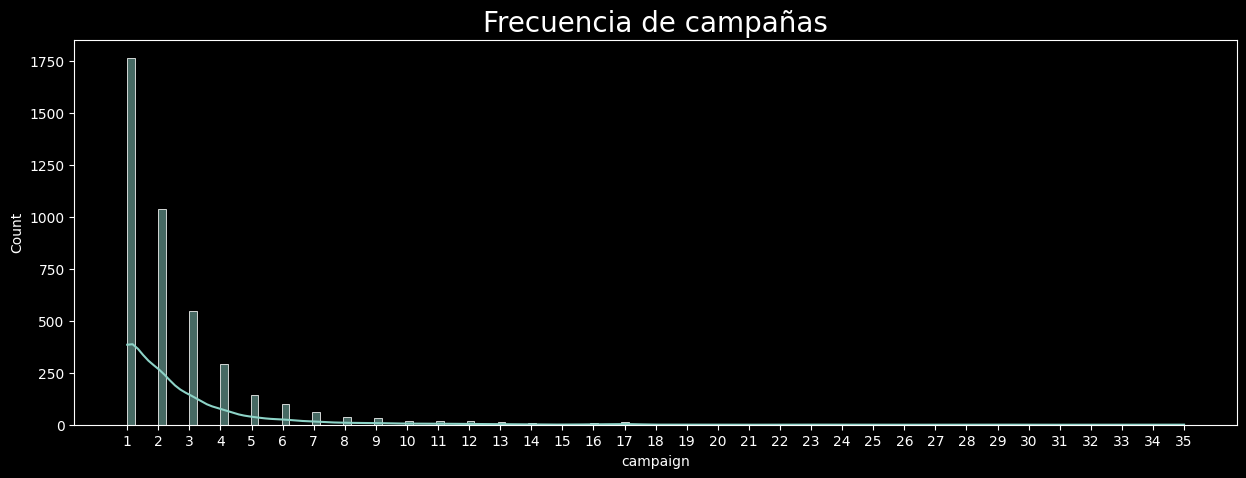

In [12]:
fig, ax = plt.subplots(1,1, figsize=(15,5)) # creamos el lienzo

sns.histplot(data=bank_df_2['campaign'], kde=True)
ax.set_title('Frecuencia de campañas', fontsize=20)
plt.xticks(range(1,36,+1));

In [13]:
bank_df_2[bank_df_2['campaign'] > 11].sort_values(by='campaign') # filtro y ordeno las campañas por su valor nominal para compara y entender la curva anterior

,age,job,education,month,campaign,previous,poutcome,y
3319,49,technician,professional.course,jul,12,0,nonexistent,no
1216,45,services,high.school,may,12,0,nonexistent,no
3433,30,management,high.school,aug,12,0,nonexistent,no
2108,32,services,high.school,may,12,0,nonexistent,no
836,31,blue-collar,basic.6y,jun,12,0,nonexistent,no
...,...,...,...,...,...,...,...,...
2485,41,technician,high.school,jun,24,0,nonexistent,no
56,29,admin.,university.degree,jun,27,0,nonexistent,no
3564,25,admin.,basic.9y,jul,29,0,nonexistent,no
3241,39,services,high.school,jul,29,0,nonexistent,no


####  ¿Cuales fueron las campañas más exitosas?, ¿las que tuvieron mejores resultados?

In [14]:
# agrupamos los datos por campaña y contamos la cantidad de 'yes' en la columna 'y'
camp_yes = bank_df_2[bank_df_2['y'] == 'yes'].groupby('campaign')['y'].count()
camp_yes

campaign
1     219
2     119
3      62
4      32
5       9
6       4
7       1
8       2
9       1
10      1
11      1
Name: y, dtype: int64

In [15]:
# creamos las variables para los ejes del gráfico, utilizaremos un barplot, para comparar
x = camp_yes.index
y = camp_yes.values

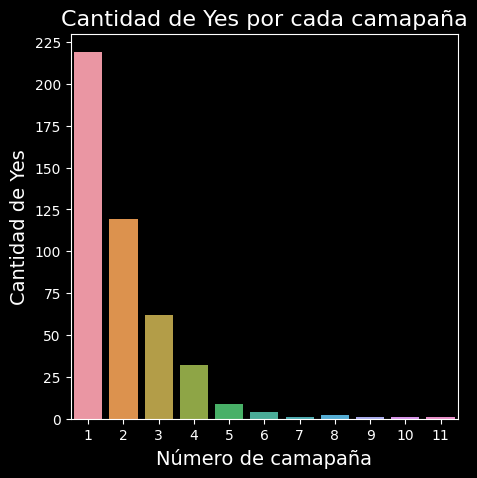

In [16]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.barplot(x=x, y=y)
ax.set_ylabel('Cantidad de Yes', fontsize=(14))
ax.set_xlabel('Número de camapaña', fontsize=(14))
ax.set_title('Cantidad de Yes por cada camapaña', fontsize=(16))
plt.yticks(range(0,max(y)+25, +25)); # seteamos el rnago de ticks y su crecimiento

In [17]:
# cuento cuantas campañas ahy en el dataset de cada una
campaign_counts = bank_df['campaign'].value_counts()
campaign_counts

1     1764
2     1039
3      549
4      291
5      142
6       99
7       60
8       36
9       32
10      20
11      19
12      16
17      14
13      11
16       7
14       6
15       2
22       2
19       2
23       2
29       2
27       1
18       1
24       1
35       1
Name: campaign, dtype: int64

In [18]:
# ahora me interesaría ver cual es la proporción de 'yes' para cada grupo de camapañas, asi podemos estimar su éxito
proporcion = bank_df_2.groupby('campaign')['y'].apply(lambda x: (x == 'yes').mean())
proporcion

campaign
1     0.124150
2     0.114533
3     0.112933
4     0.109966
5     0.063380
6     0.040404
7     0.016667
8     0.055556
9     0.031250
10    0.050000
11    0.052632
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
22    0.000000
23    0.000000
24    0.000000
27    0.000000
29    0.000000
35    0.000000
Name: y, dtype: float64

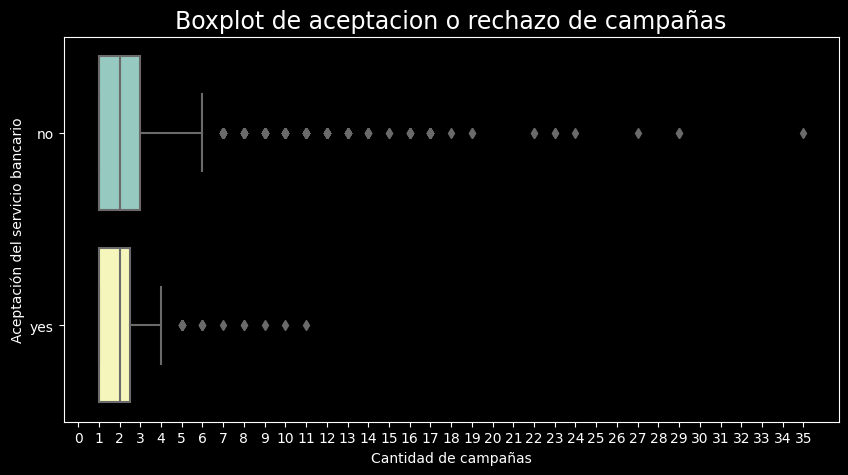

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) # inicio con el lienzo
sns.boxplot(data= bank_df_2, x='campaign', y='y') # de donde obtiene los datos
plt.xticks(range(0, max(bank_df['campaign'])+1, +1)) # con esta linea le cambiamos los ticks del eje X para darle más visibilidad y que no se amontonen
ax.set_title('Boxplot de aceptacion o rechazo de campañas', fontsize=17) # titulos..
ax.set_xlabel('Cantidad de campañas') # labels, nada que explicar
ax.set_ylabel('Aceptación del servicio bancario');

#### ¿Que ocupaciones tendrán las personas que más contratan los servicios del banco?

In [20]:
proporcion_job = bank_df_2.groupby('job')['y'].apply(lambda x: (x == 'yes').mean())
proporcion_job

job
admin.           0.131423
blue-collar      0.069005
entrepreneur     0.054054
housemaid        0.100000
management       0.092593
retired          0.228916
self-employed    0.081761
services         0.089059
student          0.231707
technician       0.115774
unemployed       0.171171
unknown          0.102564
Name: y, dtype: float64

In [21]:
bar_labels = bank_df_2['job'].values
bar_labels = np.unique(bar_labels)
bar_labels

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

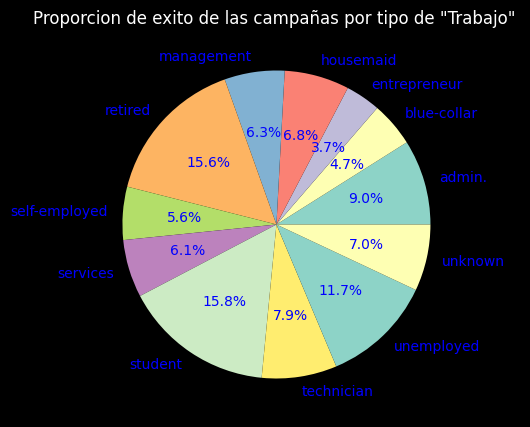

In [36]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.pie(proporcion_job, labels=bar_labels, autopct="%1.1f%%") #agregamos esta linea para ponerle los %% dentro del gráfico, por defecto quedan por fuera.
ax.set_title('Proporcion de exito de las campañas por tipo de "Trabajo" ')
for text in ax.texts:
  text.set_color('blue'); # cambié el color

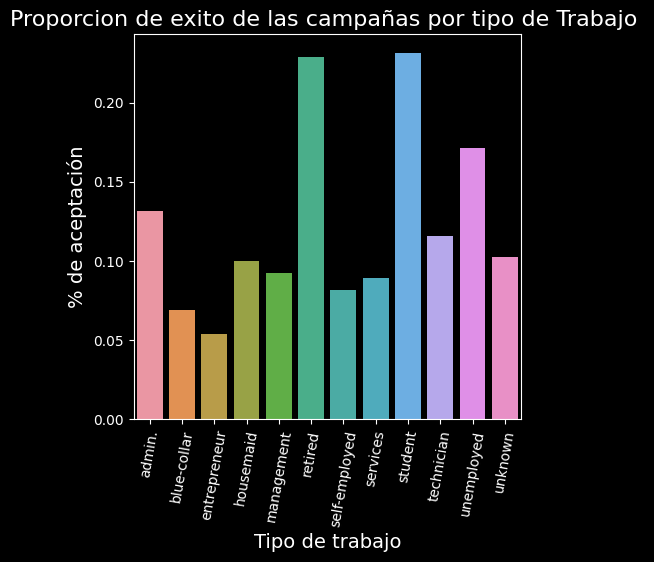

In [38]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.barplot(x=bar_labels, y=proporcion_job)
ax.set_ylabel('% de aceptación', fontsize=(14))
ax.set_xlabel('Tipo de trabajo', fontsize=(14))
ax.set_title('Proporcion de exito de las campañas por tipo de Trabajo ', fontsize=(16))
ax.tick_params(axis='x', rotation=80); # giramos el texto de los labels del eje x para su correcta lectura

#### ¿Son las campañas telefónicas más efectivas entre las personas con estudios alcanzados más elevados?

In [ ]:
proporcion_education = bank_df_2.groupby('education')['y'].apply(lambda x: (x == 'yes').mean())
proporcion_education

In [ ]:
bar_labels_education = bank_df_2['education'].values
bar_labels_education = np.unique(bar_labels_education)
bar_labels_education

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.barplot(x=bar_labels_education, y=proporcion_education)
ax.set_ylabel('% de aceptación', fontsize=(14))
ax.set_xlabel('Tipo de trabajo', fontsize=(14))
ax.set_title('Proporcion de exito de las campañas por nivel educativo ', fontsize=(16))
ax.tick_params(axis='x', rotation=75); # giramos el texto de los labels del eje x para su correcta lectura

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.pie(proporcion_education, labels=bar_labels_education, autopct="%1.1f%%") #agregamos esta linea para ponerle los %% dentro del gráfico, por defecto quedan por fuera.
ax.set_title('Proporcion de exito de las campañas por nivel educativo ')
for text in ax.texts:
  text.set_color('blue'); # cambié el color

## Con clusiones del EDA
Con los analisis estadísticos realizados podemos concluir que:
A pesar de repetir campañas, los clientes que eligen no contratar los servicios, es dificil que se los pueda convencer con insistencia al largo plazo, hay un exito notable en las primeras 4 campañas, pero a partir de la 4ta campaña el exito disminuye muchísimo

también observamos que las ocupaciones de los alcanzados por las camapañas que más concretan la suscripción al servicio bancario son los estudiantes, seguimos muy de cerca por retirados, luego desempleados con un buen margen y pegadito a ellos en 4to lugar los administrativos.

Por otro lado, el nivel educativo parece estar más igualado pero se puede notar que los profesionales y universitarios son mayoría entre las camapañas exitosas, lo cual nos puede ayudar a elegir mejor a quien apuntar próximas campañas

## 6ta fase: Data Wrangling

##### Comenzamos verificando si hay NaN

In [ ]:
bank_df_2.isnull().sum()

In [23]:
bank_df_3 = bank_df_2.loc[bank_df_2['campaign'] <= 17]
bank_df_3

,age,job,education,month,campaign,previous,poutcome,y
0,30,blue-collar,basic.9y,may,2,0,nonexistent,no
1,39,services,high.school,may,4,0,nonexistent,no
2,25,services,high.school,jun,1,0,nonexistent,no
3,38,services,basic.9y,jun,3,0,nonexistent,no
4,47,admin.,university.degree,nov,1,0,nonexistent,no
...,...,...,...,...,...,...,...,...
4114,30,admin.,basic.6y,jul,1,0,nonexistent,no
4115,39,admin.,high.school,jul,1,0,nonexistent,no
4116,27,student,high.school,may,2,1,failure,no
4117,58,admin.,high.school,aug,1,0,nonexistent,no


#### al no tener NaN nos ahorramos las imputaciones y ya limpiamos los features que no usaríamos en el analisis en la fase de EDA. Y limpiamos los outliers de campañas superiores a la 13va (pasamos de 4119 a 4107 registros)

## 7ma fase: Selección del algorítmo de Machine Learning
como se trata de un problema de clasificación voy a elegir 2 modelos que sobresalen en estos casos: DecisionTreeClassifier y RandomForestClassifier. para lo cual vamos a necesitar un encoding de las variables job y education que realizaré en el siguiente apartado, la fase 8: Desarrollo del algoritmo

## 8va fase: Desarrollo del algoritmo
primero vamos a verificar los coeficientes de correlación de las variables predictoras y objetivo, luego pasamos al encoding de las variables y ya depsues entrenamos los modelos.

In [25]:
# vamos a importar las librerias que usaremos  en este apartado, incluimos SVC para testear ese algoritmo
from sklearn.preprocessing import LabelEncoder # la libreria para del encoder
from sklearn.tree import DecisionTreeClassifier # estas 3 lineas son para los algoritmos de entrenamiento
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [39]:
# Primero codificamos la variable respuesta de forma manual porque es binaria, asi que super simple con esta linea transformamos los yes, por 1 y los no por 0
bank_df_3['y codif'] = bank_df_3['y'].map({'yes': 1, 'no': 0})
bank_df_3.head(20)

C:\Users\guill\AppData\Local\Temp\ipykernel_9104\3764503021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_3['y codif'] = bank_df_3['y'].map({'yes': 1, 'no': 0})


,age,job,education,month,campaign,previous,poutcome,y,codif job,y codif
0,30,blue-collar,basic.9y,may,2,0,nonexistent,no,1,0
1,39,services,high.school,may,4,0,nonexistent,no,7,0
2,25,services,high.school,jun,1,0,nonexistent,no,7,0
3,38,services,basic.9y,jun,3,0,nonexistent,no,7,0
4,47,admin.,university.degree,nov,1,0,nonexistent,no,0,0
5,32,services,university.degree,sep,3,2,failure,no,7,0
6,32,admin.,university.degree,sep,4,0,nonexistent,no,0,0
7,41,entrepreneur,university.degree,nov,2,0,nonexistent,no,2,0
8,31,services,professional.course,nov,1,1,failure,no,7,0
9,35,blue-collar,basic.9y,may,1,0,nonexistent,no,1,0


In [31]:
bank_df_3['job'].unique() #traigo la lista de valores únicos de la columan 'jobs' para ver con que trabajamos

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [32]:
bank_df_3['education'].unique() # hacemos lo mismo con la otra columna 'education'

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [33]:
# instanciamos ámbas
encoder_job = LabelEncoder()
encoder_education = LabelEncoder()

In [34]:
# les cargo la data a los encoders
encoder_job.fit(bank_df_3['job'])
encoder_education.fit(bank_df_3['education'])

LabelEncoder()

In [35]:
# y con este metodo .transform cambio la data a la codificada y la igualo en una nueva columna
bank_df_3['codif job'] = encoder_job.transform(bank_df_3['job'])
bank_df_3

C:\Users\guill\AppData\Local\Temp\ipykernel_9104\838135136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_3['codif job'] = encoder_job.transform(bank_df_3['job'])


,age,job,education,month,campaign,previous,poutcome,y,codif job
0,30,blue-collar,basic.9y,may,2,0,nonexistent,no,1
1,39,services,high.school,may,4,0,nonexistent,no,7
2,25,services,high.school,jun,1,0,nonexistent,no,7
3,38,services,basic.9y,jun,3,0,nonexistent,no,7
4,47,admin.,university.degree,nov,1,0,nonexistent,no,0
...,...,...,...,...,...,...,...,...,...
4114,30,admin.,basic.6y,jul,1,0,nonexistent,no,0
4115,39,admin.,high.school,jul,1,0,nonexistent,no,0
4116,27,student,high.school,may,2,1,failure,no,8
4117,58,admin.,high.school,aug,1,0,nonexistent,no,0


In [40]:
# repetimos proceso con education
bank_df_3['codif education'] = encoder_education.transform(bank_df_3['education'])
bank_df_3

C:\Users\guill\AppData\Local\Temp\ipykernel_9104\2310020193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_3['codif education'] = encoder_education.transform(bank_df_3['education'])


,age,job,education,month,campaign,previous,poutcome,y,codif job,y codif,codif education
0,30,blue-collar,basic.9y,may,2,0,nonexistent,no,1,0,2
1,39,services,high.school,may,4,0,nonexistent,no,7,0,3
2,25,services,high.school,jun,1,0,nonexistent,no,7,0,3
3,38,services,basic.9y,jun,3,0,nonexistent,no,7,0,2
4,47,admin.,university.degree,nov,1,0,nonexistent,no,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,basic.6y,jul,1,0,nonexistent,no,0,0,1
4115,39,admin.,high.school,jul,1,0,nonexistent,no,0,0,3
4116,27,student,high.school,may,2,1,failure,no,8,0,3
4117,58,admin.,high.school,aug,1,0,nonexistent,no,0,0,3


### Codificacion de JOB

| Llave | Valor         |
|-------|---------------|
| 0     | admin         |
| 1     | blue-collar   |
| 2     | entrepreneur  |
| 3     | housemaid     |
| 4     | management    |
| 5     | retired       |
| 6     | self-employed |
| 7     | services      |
| 8     | student       |
| 9     | technician    |
| 10    | unemployed    |
| 11    | unknown       |

### Codificacion de education
| Llave | Valor               |
|-------|---------------------|
| 0     | basic.4y            |
| 1     | basic.6y            |
| 2     | basic.9y            |
| 3     | high.school         |
| 4     | illiterate          |
| 5     | professional.course |
| 6     | university.degree   |
| 7     | unknown             |

In [41]:
# creo una nueva variable para alojar todas las columnas numéricas y calcular la correlacion con la columna objetivo del analisis 'y' ahora codificada a 'y codif'
num_cols = bank_df_3.select_dtypes(include=np.number).columns
num_cols

Index(['age', 'campaign', 'previous', 'codif job', 'y codif',
       'codif education'],
      dtype='object')

In [42]:
# recordatorio: los valores cercanos a 0, significa que no hay correlación lineal o que es mínima, todos los valores cercanos a -1 o 1 es que la corelacion es alta
bank_df_3[num_cols].corr()

,age,campaign,previous,codif job,y codif,codif education
age,1.000000,-0.006454,0.050793,0.013349,0.060254,-0.127303
campaign,-0.006454,1.000000,-0.093665,-0.002534,-0.076274,0.018025
previous,0.050793,-0.093665,1.000000,0.024378,0.255429,0.046010
codif job,0.013349,-0.002534,0.024378,1.000000,0.026966,0.133977
y codif,0.060254,-0.076274,0.255429,0.026966,1.000000,0.067427
codif education,-0.127303,0.018025,0.046010,0.133977,0.067427,1.000000


#### veamos las covarianzas y correlaciones

In [43]:
np.corrcoef(bank_df_3['y codif'], bank_df_3['codif job'])

array([[1.        , 0.02696624],
       [0.02696624, 1.        ]])

In [46]:
np.corrcoef(bank_df_3['y codif'], bank_df_3['codif education'])

array([[1.        , 0.06742749],
       [0.06742749, 1.        ]])

##### es notorio que la relación sea tan baja entre las predictoras y la objetivo, esto nos demuestra que la relación no es lineal.

#### Reducción de dimensionalidad para preparar la data para el modelo

In [59]:
df_reduced = bank_df_3.loc[:, ['y codif', 'codif job', 'codif education']] # con esta linea creamos un nuevo dataset para trabajar solo con las 3 variables del análisis, que ya encodeamos

In [60]:
# Vamos a los modelos, empezamos separando los datos en 2 grupos; variables predictoras y de respuesta
X = df_reduced.drop('y codif', axis=1) # el axis es para indicar que dropee verticalmente, o sea la columna
y = df_reduced['y codif']

In [61]:
X

,codif job,codif education
0,1,2
1,7,3
2,7,3
3,7,2
4,0,6
...,...,...
4114,0,1
4115,0,3
4116,8,3
4117,0,3


In [62]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y codif, Length: 4107, dtype: int64

#### Ahora dividimos los datos en 'Entrenamiento' y 'Test'

In [63]:
from sklearn.model_selection import train_test_split # importamos de scikitlearn la funcion de split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # vamos a elegir %30 para test porque tenemos unas cuantas rows, nos van a quedar cerca de 3k para entrenar

In [64]:
# Para no ocupar tanto espacio del notebook, dejo comentadas las variables X_test y las variables y_test y train para poder visualziar la que se desee, comentando las otras
X_train
#X_test
#y_train
#y_test

,codif job,codif education
2086,1,3
4045,6,6
3449,7,2
3498,7,5
1451,7,3
...,...,...
2539,1,2
1447,1,2
624,0,6
1200,3,0


#### Instanciando los modelos

In [65]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC() # maquina de vectores de soporte, es el algoritmo que divide en hiperplanos para maximizar el margen entre clases, lo vamos a probar a ver si funciona bien con nuestros datos

#### Entrenando los modelos

In [66]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

#### Predicciones

In [67]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [68]:
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 9na fase: Validación y Despliegue
EN esta fase vamso a elegir 1 de los modelos probados, para ello vamos a medir su rendimiento con métricas de los modelos

In [73]:
from sklearn.metrics import accuracy_score # ya traemos metrics para poder hacer las comparaciones

#### Accuracy: empezamos por el accuracy de cada modelo que es la cantidad de aciertos en el total de predicciones de cada modelo ((TP+TN)/T) rango 1-0

In [74]:
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_dt

0.8961881589618816

In [75]:
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf

0.8978102189781022

In [76]:
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_svm

0.8986212489862125

El accuracy dió alto en los 3 algoritmos, cerca del 90% de precisión
ahora veamos otras métricas a ver como se comportan

exhaustividad/recall/sensitivity: mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas siguiendo la logica TP/(TP+FN) rango 1-0. mide la capasidad del algoritmo clasificador de encontrar todas las muestras positivas

precision: La precisión mide la proporción de instancias clasificadas como positivas que son realmente positivas de forma que TP/(TP+FP). parece ser lo mismo que accuracy pero no porque esta metrica hace hincapie en no etiquetar una muestra positiva que es negativa. rango 1-0

f1_score:  El F1-score es la media armónica entre la precisión y la exhaustividad. 2*((precision-recall)/(precision+recall)) rango 1-0 y marca la contribución relativa de precision y recall

In [77]:
from sklearn.metrics import recall_score, precision_score, f1_score
rec_dt = recall_score(y_test, y_pred_dt)
rec_rf = recall_score(y_test, y_pred_rf)
rec_svm = recall_score(y_test, y_pred_svm)

In [78]:
rec_dt

0.024

In [79]:
rec_rf

0.024

In [80]:
rec_svm

0.0

In [81]:
prec_dt = precision_score(y_test, y_pred_dt)
prec_rf = precision_score(y_test, y_pred_rf)
prec_svm = precision_score(y_test, y_pred_svm, zero_division=0) # agregué el zero_division por un error, parece que estaba prediciendo 0 afirmaciones y no podia hacer la div

In [82]:
prec_dt

0.3333333333333333

In [83]:
prec_rf

0.42857142857142855

In [84]:
prec_svm

0.0

In [85]:
f1_dt = f1_score(y_test, y_pred_dt)
f1_rf = f1_score(y_test, y_pred_rf)
f1_svm = f1_score(y_test, y_pred_svm)

In [86]:
f1_dt

0.04477611940298507

In [87]:
f1_rf

0.045454545454545456

In [88]:
f1_svm

0.0

#### Ahora calculemos el area bajo la curva bajo ROC también conocida como la metrica 'AUC'
El puntaje AUC (Área bajo la curva ROC) es una métrica comúnmente utilizada para evaluar la capacidad de un modelo de clasificación binaria para distinguir entre las clases positivas y negativas. El puntaje AUC varía entre 0 y 1, donde un valor de 1 indica un modelo perfecto que puede distinguir perfectamente entre las clases positivas y negativas, mientras que un valor de 0.5 indica un modelo que no tiene capacidad de discriminación y es equivalente a adivinar al azar.

In [89]:
from sklearn.metrics import roc_auc_score

In [91]:
probs_dt = dt.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, probs_dt)
print(f'Decision Tree AUC: {auc_dt:.2f}') # busque como imprimirlo en pantalla para que se vea bonito y entendible

AUC: 0.56


In [92]:
probs_rf = rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, probs_rf)
print(f'Random Forest AUC: {auc_rf:.2f}')

Random Forest AUC: 0.56


In [ ]:
probs_svm = svm.predict_proba(X_test)[:, 1]
auc_svm = roc_auc_score(y_test, probs_svm)
print(f'SVM AUC: {auc_svm:.2f}')

## 10ma fase: Conclusiones

#### Decision Tree: f1 = 0.045 / precision = 0.75 / recall = 0.023 / accuracy = 0.897 / AUC = 0.56
f1 muy bajo esto significaria una baja contribución relativa entre recall (0.023) y precision(0.75), llama la atencion que en todos los algoritmos da bajo
#### Random Forest: f1 = 0.045 / precision = 0.75 / recall = 0.023 / accuracy = 0.897 / AUC = 0.56
esperaba valroes muy similares al decision tree, pero no me esperaba que sean identicos.
#### SVM: f1 = 0.0 / precision = 0.0 / recall = 0.0 / accuracy = 0.895 / AUC =/= (error no predice)
acá tenemos un problema claro, el modelo está clasificando todas las instancias positivas como negativas, pero el accuracy alto, me hace pensar que esta clasificando bien las negativas, solo que erró en todas las positivas.... me lleva a pensar que debe haber clasificado a todo como negativo, como hay muchos más NO que SI en el datset eso le da un accuracy alto pero falla en las demás metricas.

#### En definitiva el modelo iene buena probabilidad de aciertos entre el total de predicciones, pero desciende a 0.75 cuando le damos importancia a no etiquetar mal los positivos. Ahora la exhaustividad baja nos dice que hay muchas instancias positivas que no pudo predecir correctamente, eso nos indica porque el F1 da bajo también.

### Lamentablemente no es recomendable no es recomendable desplegar este modelo ya que sus métricas no cumplen con el objetivo, estaríamos interesados en conseguir métricas de AUC y precisión superiores al 80% para lo cual seguiremos trabajando en mejorar las métricas

Propuestas: Podemos intentar entrenar los modelos con otro conjunto variables, o agrgar más como edad y así quizá tener mayores aciertos